Filename: _4_random_forest.ipynb <br>
Title: Random Forest model building <br>
Author: Raghava | GitHub: @raghavtwenty <br>
Date Created: June 10, 2023 | Last Updated: May 13, 2024 <br>
Language: Python | Version: 3.10.14, 64-bit <br>

Importing Required Libraries


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from _1_confus_mat_display import display_confus_matrix

Importing Preprocessed Dataset


In [2]:
data_frame = pd.read_csv("../datasets/cleaned_dataset.csv")

Train Test split


In [3]:
X = data_frame.drop(columns=["Label"])
y = data_frame["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

Random Forest Classifier


In [4]:
rf_classifier = RandomForestClassifier()

# Hyperparameters
parameters = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Grid search
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
)
grid_search_rf.fit(X_train, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_

Train again with best parameters


In [5]:
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

Classification Metrics


In [6]:
classifi_report = classification_report(y_test, y_pred_rf)
print(classifi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.96      0.97      0.96       119
           2       0.86      0.88      0.87       148
           3       0.83      0.87      0.85       134
           4       0.98      0.84      0.91        64

    accuracy                           0.91       586
   macro avg       0.93      0.91      0.92       586
weighted avg       0.92      0.91      0.91       586



Confusion Matrix


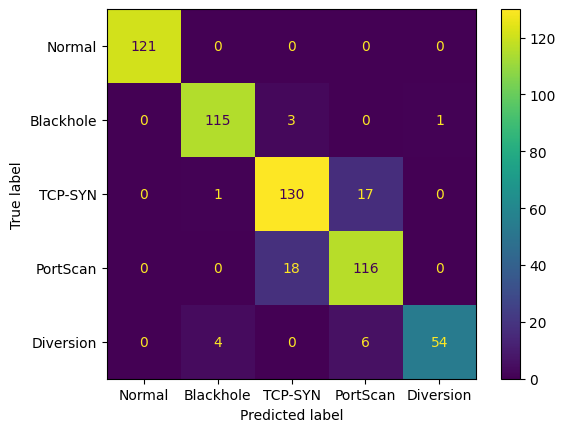

In [7]:
display_confus_matrix(y_test, y_pred_rf)

Evaluating accuracy

In [8]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("Best Hyperparameters:")
for key, value in best_params_rf.items():
    print(key, ":", value)

Random Forest Accuracy: 0.9147
Best Hyperparameters:
max_depth : 20
min_samples_leaf : 1
min_samples_split : 2
n_estimators : 300


Save the model

In [9]:
from joblib import dump
dump(best_rf_classifier, "../models/m2_random_forest.joblib")

['../models/m2_random_forest.joblib']

Test data for each category with new user input

In [1]:
l0_x = [[4, 350188, 14877116, 101354648, 159524, 2910, 278, 280, 5, 4, 0, 6, 667324]]

l1_x = [[2, 2326, 12856942, 31777516, 2998, 2497, 560, 560, 5, 2, 0, 4, 7259]]

l2_x = [[4, 150, 19774, 6475473, 3054, 166, 556, 6068, 5, 4, 502, 6, 7418]]

l3_x = [[2, 209, 20671, 6316631, 274, 96, 3527, 2757949, 5, 2, 183877, 8, 90494]]

l4_x = [[2, 1733, 37865130, 38063670, 3187, 2152, 0, 556, 5, 3, 0, 4, 14864]]

New input prediction

In [7]:
# Importing required libraries
import numpy as np
from joblib import load
from _2_scale_transform import transform_new_input

# Load the model
model = load("../models/m2_random_forest.joblib")

# Preprocessing input
user_input = np.array(l4_x)  # Change values and try changing "l4_x"
user_input = transform_new_input(user_input)

# Prediction
predict = model.predict(user_input)

# Final Show
print(f"Predicted label: {predict[0]}")

Predicted label: 4


/Users/raghav/miniconda3/envs/ids/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
